# ZNE with AER Estimator

In [1]:

from qiskit.providers.fake_provider import FakeNairobi, FakeGuadalupeV2, FakeGuadalupe

from zne import zne, ZNEStrategy
from zne.noise_amplification import LocalFoldingAmplifier
from zne.extrapolation import PolynomialExtrapolator

In [2]:
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp

## Build our input circuit and observable
circuit = random_circuit(2, 4, seed=1).decompose(reps=1)
observable = SparsePauliOp("ZZ")

# Exact Results

In [3]:
from qiskit.primitives import Estimator
estimator = Estimator()

job = estimator.run(
    circuit,
    observable,
    shots = None
)
exact_values = job.result().values

# ZNE Results

In [4]:
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_aer.noise import NoiseModel
seed = 170
device = FakeGuadalupe()
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)

In [5]:
## Build ZNEEstimator
ZNEEstimator = zne(AerEstimator)
estimator = ZNEEstimator(backend_options={
        "method": "density_matrix",
        "coupling_map": coupling_map,
        "noise_model": noise_model,
    },
    run_options={"seed": seed, "shots": 10000},
    transpile_options={"seed_transpiler": seed},)

TypeError: __init__() got an unexpected keyword argument 'options'

In [ ]:
zne_strategy = ZNEStrategy(
    noise_factors=range(1, 9),
    noise_amplifier=LocalFoldingAmplifier(gates_to_fold=2),
    extrapolator=PolynomialExtrapolator(degree=3),
)

/home/nico/QuantumRadioAstronomy/prototype-zne/zne/noise_amplification/folding_amplifier/folding_amplifier.py:147: UserWarning: Rounding of noise factor: Foldings are performed with noise factor 1.80 instead of specified noise factor 2.00 which amounts to a relative error of 10.00%.
  warn(
/home/nico/QuantumRadioAstronomy/prototype-zne/zne/noise_amplification/folding_amplifier/folding_amplifier.py:147: UserWarning: Rounding of noise factor: Foldings are performed with noise factor 4.20 instead of specified noise factor 4.00 which amounts to a relative error of 5.00%.
  warn(
/home/nico/QuantumRadioAstronomy/prototype-zne/zne/noise_amplification/folding_amplifier/folding_amplifier.py:147: UserWarning: Rounding of noise factor: Foldings are performed with noise factor 5.80 instead of specified noise factor 6.00 which amounts to a relative error of 3.33%.
  warn(
/home/nico/QuantumRadioAstronomy/prototype-zne/zne/noise_amplification/folding_amplifier/folding_amplifier.py:147: UserWarning

[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 260, '0x0': 174, '0x2': 3019, '0x3': 6547}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=1.5707963267948961, memory_slots=2, metadata={'basis': Pauli('ZZ')}, n_qubits=16, name='circuit-121', qreg_sizes=[['q', 16]]), status=DONE, seed_simulator=170, metadata={'noise': 'superop', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 6, 'sample_measure_time': 0.001443988, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'density_matrix', 'fusion': {'applied': False, 'max_fused_qubits': 2, 'threshold': 7, 'enabled': True}}, time_taken=0.021855899), ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 310, '0x0': 203, '0x2': 3120, '0x3': 6367}), header=QobjExperimentHea

/home/nico/QuantumRadioAstronomy/prototype-zne/zne/zne_strategy.py:298: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma_y = [sqrt(md.get("variance", 1)) for md in result_group.metadata]


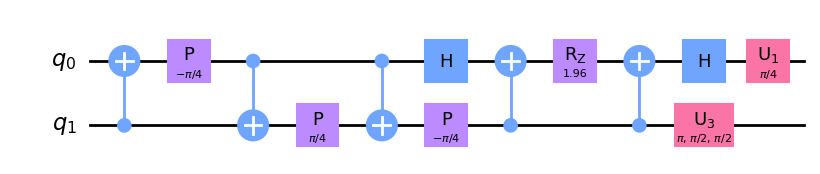

  > Observable: ['ZZ']
  > Expectation value: 0.38585553959796876
  > Metadata: {'std_error': 2.330125500925508, 'zne': {'noise_amplification': {'noise_amplifier': <LocalFoldingAmplifier:{'gates_to_fold': 2, 'noise_factor_relative_tolerance': 0.01, 'random_seed': None, 'sub_folding_option': 'from_first'}>, 'noise_factors': (1, 2, 3, 4, 5, 6, 7, 8), 'values': (0.3442, 0.314, 0.2956, 0.2996, 0.283, 0.2888, 0.2558, 0.2464), 'shots': (10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000), 'variance': ((0.88152636+0j), (0.901404+0j), (0.91262064+0j), (0.91023984+0j), (0.919911+0j), (0.9165945600000001+0j), (0.93456636+0j), (0.93928704+0j)), 'simulator_metadata': ([{'noise': 'superop', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 6, 'sample_measure_time': 0.001443988, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'densi

In [ ]:
## Run experiment
job = estimator.run(circuit, observable, zne_strategy=zne_strategy)  # !!!
result = job.result()

## Display results
display(circuit.draw("mpl"))
print(f"  > Observable: {observable.paulis}")
print(f"  > Expectation value: {result.values[0]}")
print(f"  > Metadata: {result.metadata[0]}")

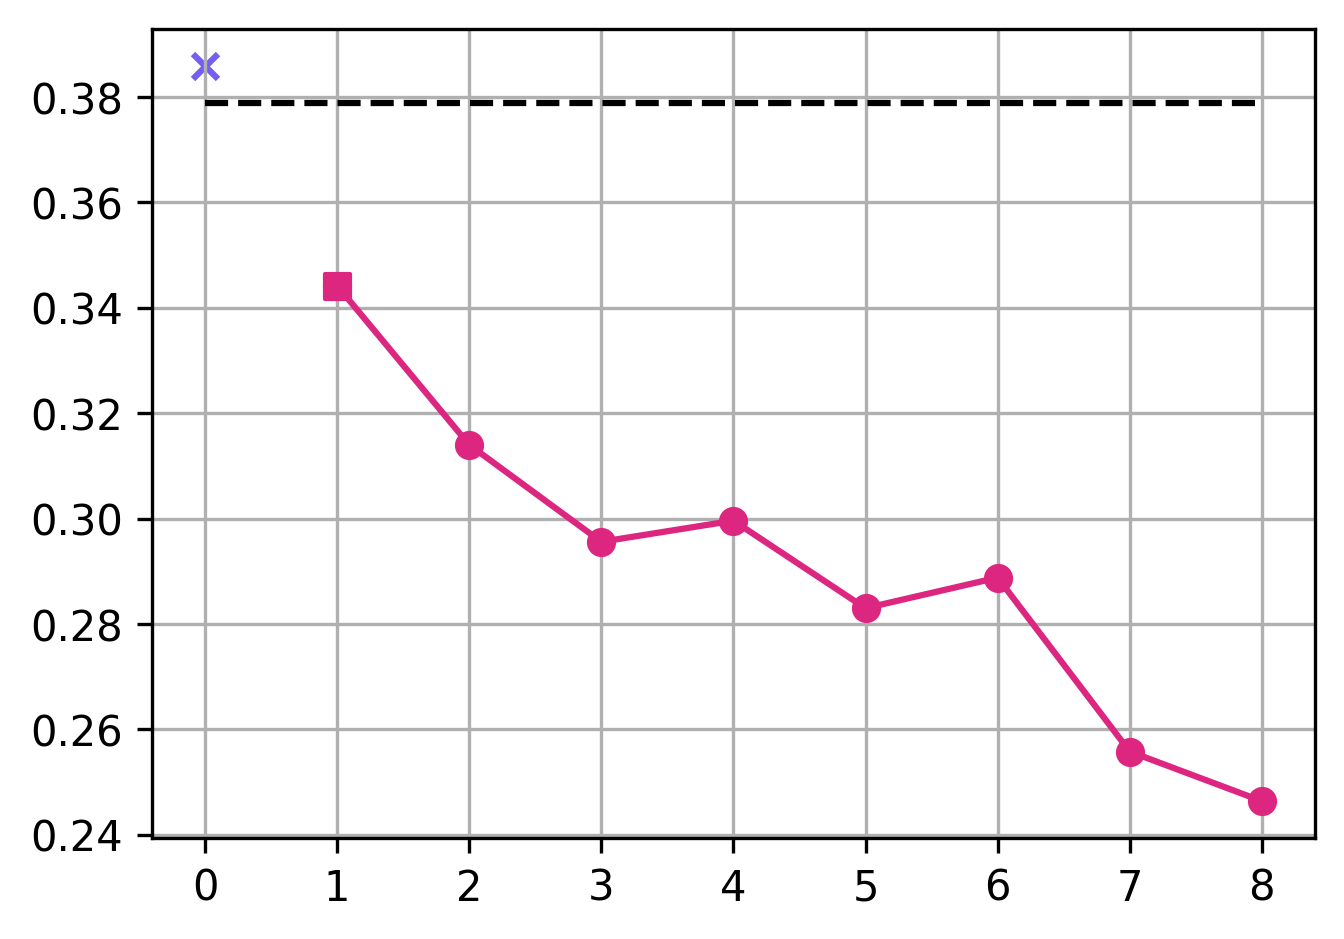

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["figure.dpi"] = 300
# plt.rcParams.update({"text.usetex": True, "font.family": "Computer Modern Roman"})

############################  DATA  ############################

exact = exact_values[0]  # From simulation above
mitigated = result.values[0]
noise_factors = result.metadata[0]["zne"]["noise_amplification"]["noise_factors"]
noisy_values = result.metadata[0]["zne"]["noise_amplification"]["values"]

############################  PLOT  ############################
plt.rcParams["figure.figsize"] = (5,3.5)
plt.grid(which='major',axis='both')

plt.plot([0, noise_factors[-1]], [exact, exact], "--", label="Exact", color="#000000")
plt.scatter(0, mitigated, label="Mitigated", marker="x", color="#785ef0")
if noise_factors[0] == 1:
    plt.scatter(
        noise_factors[0], noisy_values[0], 
        label="Unmitigated", marker="s", color="#dc267f",
    )
plt.plot(
    noise_factors, noisy_values, 
    label="Amplified", marker="o", color="#dc267f",
)

plt.show()